# Introdução

FIFA 22 é um jogo de videogame de simulação de futebol desenvolvido pela EA Sports. Foi lançado para Microsoft Windows, PlayStation 4 e Xbox One em outubro de 2021. O jogo apresenta mais de 700 times licenciados e mais de 17.000 jogadores, permitindo que os jogadores escolham entre uma variedade de times e jogadores para criar seu próprio time dos sonhos. Ele também inclui vários modos de jogo, como o popular modo Ultimate Team, que permite aos jogadores construir e gerenciar seu próprio time coletando e trocando cartas de jogadores. Além desses recursos, o jogo também inclui várias melhorias e atualizações na jogabilidade, gráficos e outras áreas, tornando-o uma experiência agradável e envolvente para os jogadores. 
<br>
  Deste modo através de uma análise da base de dados disponível no Kaggle contendo informações sobre os jogadores,pode-se desenvolver algumas hipóteses:

- Os jogadores mais velhos, tem atributos como velocidade e condicionamento físico pior comparado aos mais novos

- Os time mais caro tem maior número de jogadores no top 400

- Os atributos de condicionamento físico e velocidade não se relacionam no jogo,fato que ocorre na vida real.

- Dentre outras que podem surgir durante a análise.


# Carregando as bibliotecas 

In [1]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Carregando o Dataset 

In [2]:
df = pd.read_csv("players_21.csv")
df


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,216627,https://sofifa.com/player/216627/kieffer-moore...,K. Moore,Kieffer Roberto Francisco Moore,ST,69,69,1500000.0,15000.0,27,...,57+2,57+2,57+2,57+2,16+2,https://cdn.sofifa.net/players/216/627/21_120.png,https://cdn.sofifa.net/teams/1961/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1367/60.png,https://cdn.sofifa.net/flags/gb-wls.png
5788,216701,https://sofifa.com/player/216701/hernan-menoss...,H. Menosse,Jorge Hernán Menosse Acosta,CB,69,69,675000.0,2000.0,33,...,69,69,69,61+2,16+2,https://cdn.sofifa.net/players/216/701/21_120.png,https://cdn.sofifa.net/teams/101102/60.png,https://cdn.sofifa.net/flags/co.png,NaN,https://cdn.sofifa.net/flags/uy.png
5789,216750,https://sofifa.com/player/216750/patrik-carlgr...,P. Carlgren,Patrik Ulf Anders Carlgren,GK,69,71,1200000.0,6000.0,28,...,26+2,26+2,26+2,24+2,68+2,https://cdn.sofifa.net/players/216/750/21_120.png,https://cdn.sofifa.net/teams/1786/60.png,https://cdn.sofifa.net/flags/dk.png,NaN,https://cdn.sofifa.net/flags/se.png
5790,216834,https://sofifa.com/player/216834/manuel-perez/...,M. Perez,Manuel Perez,"CDM, CM",69,69,1200000.0,17000.0,29,...,66+2,66+2,66+2,64+2,15+2,https://cdn.sofifa.net/players/216/834/21_120.png,https://cdn.sofifa.net/teams/64/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/fr.png


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5792 entries, 0 to 5791
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 4.9+ MB


In [4]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [6]:
#Verificandos se possui valores Null
df.isnull().sum()

sofifa_id              0
player_url             0
short_name             0
long_name              0
player_positions       0
                    ... 
player_face_url        1
club_logo_url        114
club_flag_url        114
nation_logo_url     4925
nation_flag_url        1
Length: 110, dtype: int64

In [7]:
df["club_name"]

0              FC Barcelona
1                  Juventus
2         FC Bayern München
3       Paris Saint-Germain
4           Manchester City
               ...         
5787           Cardiff City
5788         Deportivo Cali
5789             Randers FC
5790    Racing Club de Lens
5791         Houston Dynamo
Name: club_name, Length: 5792, dtype: object

In [8]:
#Criando um novo dataset, somente com as informações relevantes para a análise
df2 = df.filter(['sofifa_id','short_name', 'player_positions','overall','value_eur', 'age','pace','club_name','physic'])

In [10]:
#Vamos visualizar nosso novo Dataset
df2

,sofifa_id,short_name,player_positions,overall,value_eur,age,pace,club_name,physic
0,158023,L. Messi,"RW, ST, CF",93,103500000.0,33,85.0,FC Barcelona,65.0
1,20801,Cristiano Ronaldo,"ST, LW",92,63000000.0,35,89.0,Juventus,77.0
2,188545,R. Lewandowski,ST,91,111000000.0,31,78.0,FC Bayern München,82.0
3,190871,Neymar Jr,"LW, CAM",91,132000000.0,28,91.0,Paris Saint-Germain,59.0
4,192985,K. De Bruyne,"CAM, CM",91,129000000.0,29,76.0,Manchester City,78.0
...,...,...,...,...,...,...,...,...,...
5787,216627,K. Moore,ST,69,1500000.0,27,75.0,Cardiff City,78.0
5788,216701,H. Menosse,CB,69,675000.0,33,58.0,Deportivo Cali,78.0
5789,216750,P. Carlgren,GK,69,1200000.0,28,NaN,Randers FC,NaN
5790,216834,M. Perez,"CDM, CM",69,1200000.0,29,70.0,Racing Club de Lens,72.0


In [11]:
# Aplicação de um filtro, para analisar-se somente os 400  primeiros jogadores
df2 = df2.loc[0:399]
df2

,sofifa_id,short_name,player_positions,overall,value_eur,age,pace,club_name,physic
0,158023,L. Messi,"RW, ST, CF",93,103500000.0,33,85.0,FC Barcelona,65.0
1,20801,Cristiano Ronaldo,"ST, LW",92,63000000.0,35,89.0,Juventus,77.0
2,188545,R. Lewandowski,ST,91,111000000.0,31,78.0,FC Bayern München,82.0
3,190871,Neymar Jr,"LW, CAM",91,132000000.0,28,91.0,Paris Saint-Germain,59.0
4,192985,K. De Bruyne,"CAM, CM",91,129000000.0,29,76.0,Manchester City,78.0
...,...,...,...,...,...,...,...,...,...
395,189271,F. Coquelin,"CM, CDM",80,20500000.0,29,71.0,Villarreal CF,81.0
396,189362,Hulk,"RW, ST",80,13000000.0,33,80.0,Shanghai Port FC,86.0
397,189505,Pedro,"RW, LW",80,16500000.0,32,73.0,Roma,50.0
398,189690,Guaita,GK,80,7000000.0,33,NaN,Crystal Palace,NaN


In [12]:
#substituindo os valores de pace e physic e value_eur por mediana e o clube por '--'
mediana_pace = df2['pace'].median()
mediana_pace

mediana_physic = df2["physic"].median()
mediana_physic

mediana_valoreur = df2["value_eur"].median()
mediana_valoreur

34250000.0

In [13]:
df2['pace'].fillna( mediana_pace,inplace = True)
df2['physic'].fillna( mediana_physic,inplace = True)
df2['value_eur'].fillna( mediana_valoreur,inplace = True)
df2['club_name'].fillna('--', inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df2

,sofifa_id,short_name,player_positions,overall,value_eur,age,pace,club_name,physic
0,158023,L. Messi,"RW, ST, CF",93,103500000.0,33,85.0,FC Barcelona,65.0
1,20801,Cristiano Ronaldo,"ST, LW",92,63000000.0,35,89.0,Juventus,77.0
2,188545,R. Lewandowski,ST,91,111000000.0,31,78.0,FC Bayern München,82.0
3,190871,Neymar Jr,"LW, CAM",91,132000000.0,28,91.0,Paris Saint-Germain,59.0
4,192985,K. De Bruyne,"CAM, CM",91,129000000.0,29,76.0,Manchester City,78.0
...,...,...,...,...,...,...,...,...,...
395,189271,F. Coquelin,"CM, CDM",80,20500000.0,29,71.0,Villarreal CF,81.0
396,189362,Hulk,"RW, ST",80,13000000.0,33,80.0,Shanghai Port FC,86.0
397,189505,Pedro,"RW, LW",80,16500000.0,32,73.0,Roma,50.0
398,189690,Guaita,GK,80,7000000.0,33,76.0,Crystal Palace,75.0


In [15]:
print(df2.isna().sum())

sofifa_id           0
short_name          0
player_positions    0
overall             0
value_eur           0
age                 0
pace                0
club_name           0
physic              0
dtype: int64


# Análises 
    Agora com um dataset mais compacto, podemos fazer algumas análises

# Análise Univariada


In [17]:
df2.club_name.value_counts()

Atlético de Madrid                   18
FC Barcelona                         16
Liverpool                            16
Real Madrid CF                       15
FC Bayern München                    15
                                     ..
U.S. Sassuolo Calcio                  1
RC Celta de Vigo                      1
Dalian Professional Football Club     1
Club Brugge KV                        1
Fenerbahçe SK                         1
Name: club_name, Length: 98, dtype: int64

Text(0.5, 1.0, 'Número de jogadores por clube')

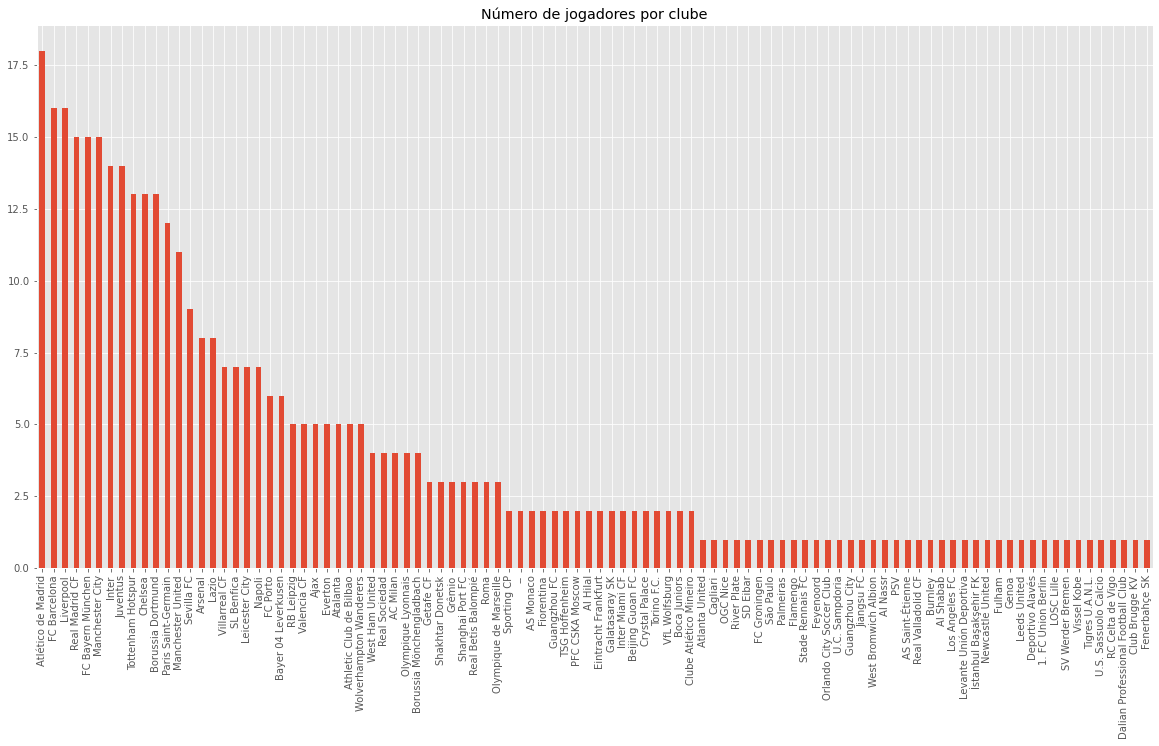

In [18]:
_=df2.club_name.value_counts().plot.bar(figsize= (20,10))
plt.title("Número de jogadores por clube")

Vemos que o Atlético de madrid é o clube com o maior número de jogadores no top 400. Em uma análise bivariada posterior verificaremos se ele também é o time mais caro. 

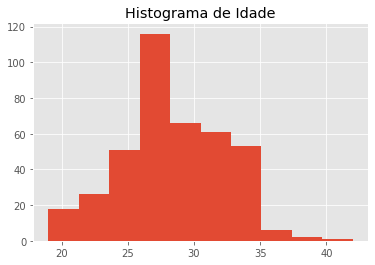

In [19]:
_= plt.hist(df2.age)
_= plt.title ("Histograma de Idade")

Nota-se que a maioria dos jogadores estão entre a faixa dos 25 a 30 anos. Posteriormente veremos se tal fato tem relação com alguma outra variável.

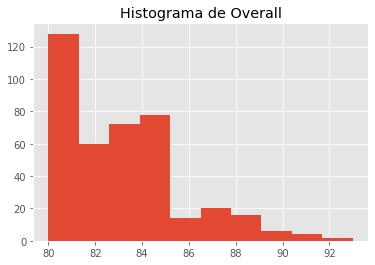

In [20]:
_= plt.hist(df2.overall)
_= plt.title ("Histograma de Overall")

Também pode-se verificar que o número de jogadores com overall elevado é menor, uma vez que existem menos jogadores com maiores habilidades.

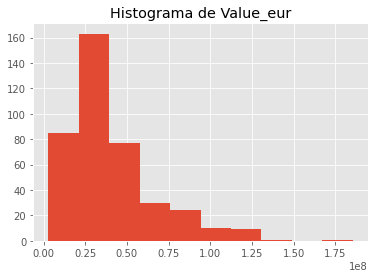

In [21]:
_= plt.hist(df2.value_eur)
_= plt.title ("Histograma de Value_eur")

Em relação aos valores dos jogadores, percebe-se um formato de histograma que lembra o histograma de overall. Em uma posterior análise bivariada, será possível verificar a relação entre as duas variáveis.

In [22]:
df2.player_positions.value_counts()

GK             62
CB             46
ST             35
LB             17
CM             17
               ..
CAM, LW, CM     1
RW, LW, CAM     1
CM, CAM, LM     1
LM, RM, LW      1
RW, ST          1
Name: player_positions, Length: 120, dtype: int64

Pode-se verificar também que o número de jogadores que joga em mais de uma posição é raro, em especial jogadores que atuam em mais de 3 posições.

# Análise Bivariada 

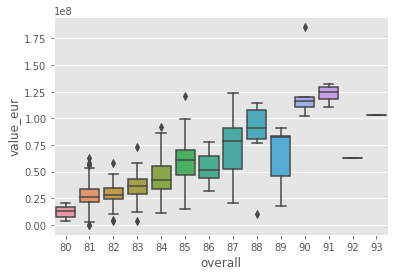

In [ ]:
_= srn.boxplot( x = 'overall' , y = "value_eur" , data = df2 ) 

Através do boxplot pôde-se avaliar a faixa de valores dos jogadores de um determinado overall. 
Nota-se que realmente conforme o overall sobe, a faixa de valores tende a subir, com excessão dos jogadores de overall 89. Podemos verificar tal fato também, em um gráfico de dispersão abaixo.
  Assim pode-se dizer que é melhor investir em um jogador com overall 89 do que 88 por exemplo, pois eles são mais baratos
e entregam atributos gerais melhores.

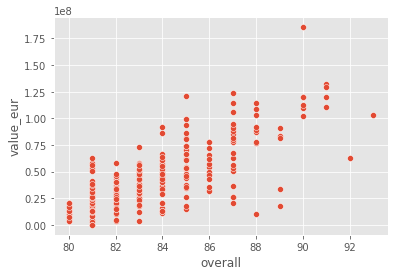

In [ ]:
_=srn.scatterplot(  x = 'overall' , y = "value_eur" , data = df2)

-----------------------------------------------------------

Pode-se também procurar relações entre os valores dos jogadores (value_eur) e a idade (age) do jogadores, utilizando o gráfico de disperção

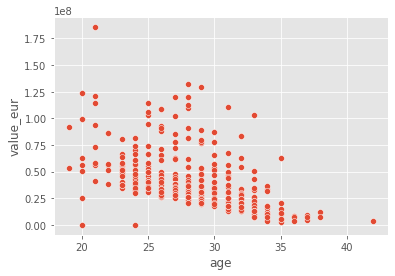

In [ ]:
_=srn.scatterplot(  x = 'age' , y = "value_eur" , data = df2)

Através do gráfico de disperção pode-se notar uma relação entre o valor do jogador e a idade do mesmo. Conforme a idade dele aumenta, o seu valor tende a diminuir.

# Análise Multivariada 

In [ ]:
df2.corr()

,sofifa_id,overall,value_eur,age,pace,physic
sofifa_id,1.000000,-0.032101,0.337315,-0.784820,0.171062,0.098511
overall,-0.032101,1.000000,0.770060,-0.017517,0.021083,-0.010451
value_eur,0.337315,0.770060,1.000000,-0.505346,0.262290,0.164879
age,-0.784820,-0.017517,-0.505346,1.000000,-0.280930,-0.159972
pace,0.171062,0.021083,0.262290,-0.280930,1.000000,0.877851
physic,0.098511,-0.010451,0.164879,-0.159972,0.877851,1.000000


Através da tabela acima, pode-se concluir alguns pontos:

1.   O valor_eur é diretamente influenciado pelo overall;
2.   O pace (um atributo relacionado a velocidade do jogador) está  muito relacionado com o physic ( condição física) do jogador.
3. Apesar de não estar tão próximo de -1 , verifica-se que a idade tem uma relativa relação com o preço do jogador.



In [ ]:
# Resumo dos principais times 

In [33]:
resumo = (
    df2.groupby(["club_name"], sort=False)
    .agg(
        #numero_jogadores =("dummy_PNSB", "sum"),
        Valor_time =("value_eur", "sum"),
        media_overall =("overall", "mean"),
        media_pace = ("pace", "mean"),
        media_physic = ("physic","mean"),
      )
    .reset_index()
)

tabela_times = resumo.sort_values(by="Valor_time", ascending= False, ignore_index=True )
tabela_times

,club_name,Valor_time,media_overall,media_pace,media_physic
0,Liverpool,1.147500e+09,85.750000,74.937500,75.687500
1,Manchester City,1.003000e+09,85.333333,78.000000,72.866667
2,Real Madrid CF,9.295000e+08,85.933333,76.333333,74.066667
3,FC Barcelona,9.145000e+08,85.500000,74.562500,72.937500
4,FC Bayern München,8.295000e+08,84.466667,75.600000,75.666667
...,...,...,...,...,...
93,Vissel Kobe,8.000000e+06,81.000000,58.000000,59.000000
94,FC Groningen,7.000000e+06,80.000000,74.000000,57.000000
95,U.C. Sampdoria,7.000000e+06,80.000000,64.000000,63.000000
96,Jiangsu FC,5.500000e+06,80.000000,65.000000,77.000000


# Conclusões
Respondendo as hipóteses:


1.   Os jogadores mais velhos não têm seus atributos de physic e pace afetados diretamente pelo atributo Age.
2.   O time mais caro (Liverpool) não possue o maior número de jogadores no top 400 (Atlético de Madrid). O Atlético de madrid ocupa a quinta colocação
3. O atributo pace e physic estão diretamente relacionados.


